# 1 - Description

The purpose of this file is to plot all the curves created for the predicted probabilities of the model on the test set (ROC, PR, Calibration, Confusion matrix).


### INPUT
- **probabilities_with_'+str(number_of_patients) +'_patients_test_size_'+str(test_size)**/ **Probabibilities** - A pickle file being a dictionary containing all the predicted probabilities on the test set for every model, target and seed.


### OUTPUT


- All the curves mentionned as figures in the Results/figures/Curves folder


----------------------------------------------------------


# 1- Packages Import

In [1]:
# Basic packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



import pickle

# Handling datetime types
from datetime import datetime

# Imputation

import sklearn.preprocessing.imputation
from sklearn.preprocessing import Imputer
# from sklearn.impute import SimpleImputer

# Split
from sklearn.model_selection import train_test_split

#Models
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.metrics import classification_report,confusion_matrix
import itertools

import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload
%autoreload 1

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# 2- Data Import and Overview

In [48]:
is_creatinine=True
#is_creatinine=False
is_filter=False
is_filter=True

test_size=0.25
path_to_add='Hemoglobin/'
number_of_patients=6139
filtered=''
if is_filter:
    number_of_patients=1553
if is_creatinine:
    path_to_add='Creatinine/'
    number_of_patients=4643
    if is_filter:
        number_of_patients=1719

In [4]:
path_to_load='../../Data/Generated_csv/'+path_to_add

## 2-1 Target

Load the icd codes that we are focusing on and recreate the list of targets as present in y

## 2-2 Load the results initialize path

In [28]:

path='../../Data/Results/'+path_to_add

test_size = 0.25

imputation_method='knn'

with open(path+'Probabilities/probabilities_with_'+str(number_of_patients) +'_patients_test_size_'+str(test_size)+imputation_method,'rb') as f:
    Probabilities=pickle.load(f)

# 2- Functions

In [17]:
%aimport curves_helper
# can look at the bottom of the file too

<Figure size 720x720 with 0 Axes>

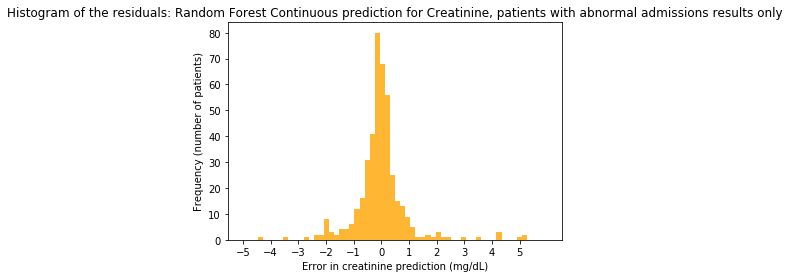

<Figure size 720x720 with 0 Axes>

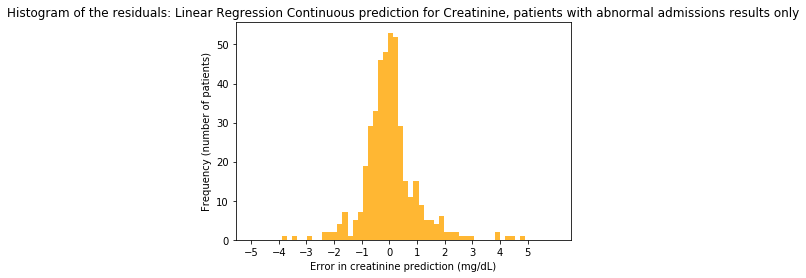

<Figure size 720x720 with 0 Axes>

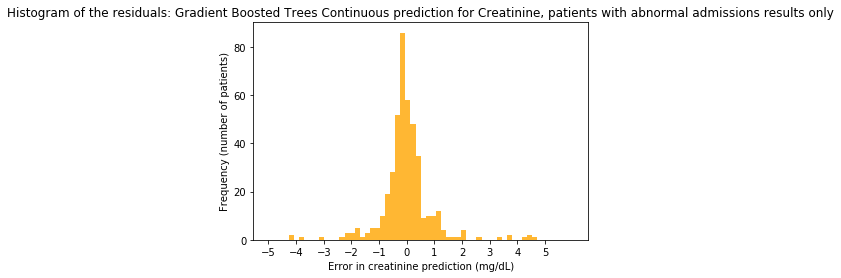

<Figure size 720x720 with 0 Axes>

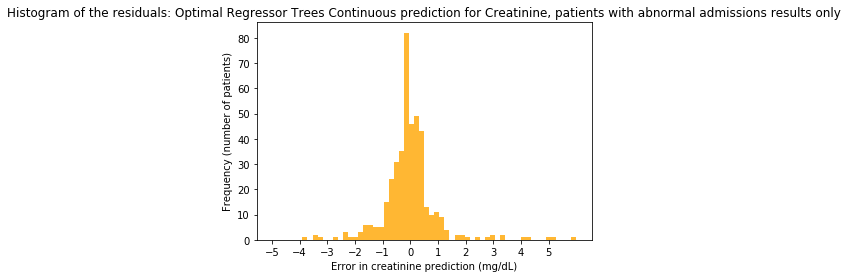

<Figure size 720x720 with 0 Axes>

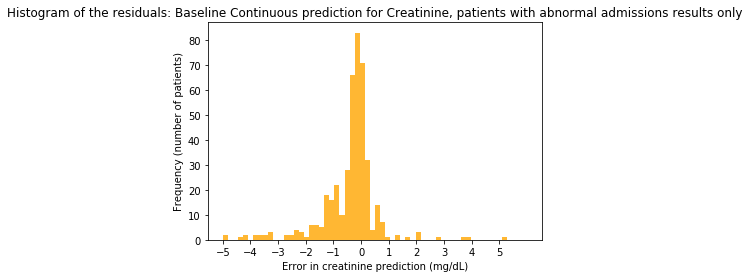

In [11]:

test_size = 0.25
seed=15
#models_to_test= ['RFC','Log']
curve='Bland'
curve='Residual'
models_to_test= ['RFC','Lin','XGB','ORT','Baseline']
#models_to_test= ['RFC']
#models_to_test= ['OCT']
target='target_baseline'
for model_name in models_to_test:
    curves_helper.plot_continuous(target,model_name,seed,number_of_patients,curve=curve,imputation_method=imputation_method,is_creatinine=is_creatinine,is_filter=is_filter,save_img=True)

RFC Average precision-recall score: 0.54
CART Average precision-recall score: 0.32
Log Average precision-recall score: 0.51
XGB Average precision-recall score: 0.56
OCT Average precision-recall score: 0.39
Baseline Average precision-recall score: 0.23


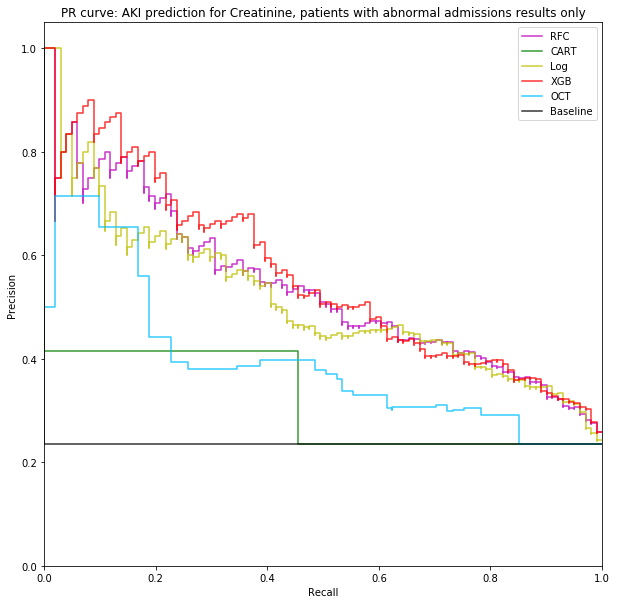

In [49]:

test_size = 0.25
seed=15
#models_to_test= ['RFC','Log']
curve='PR'
models_to_test= ['RFC','CART','Log','XGB','OCT','Baseline']
#models_to_test= ['OCT']
target='target_AKI'
preds = curves_helper.plot_all_models_one_graph(target,models_to_test,seed,number_of_patients,curve=curve,imputation_method=imputation_method,is_creatinine=is_creatinine,is_filter=is_filter,save_img=True)

## 3 - Analyze Curves

### 3-1 Get any curves for one target

AUC ROC on test set XGB:  0.939793684239425


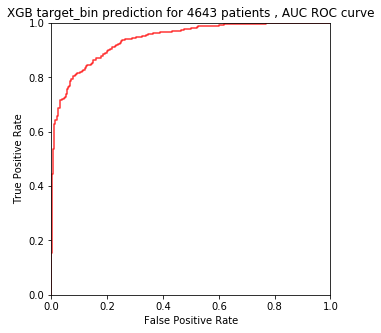

In [28]:
target='target_bin'
model_name = 'XGB'
seed=15
curves= ['ROC']

save_img=True

curves_helper.get_curves_for_target(target,
    model_name,
    seed,
    number_of_patients,
    test_size,
    imputation_method,
    curves,
    is_creatinine,
    save_img)

### 3-2 Save all curves

AUC ROC on test set OCT:  0.8745487038775364
OCT Average precision-recall score: 0.18
AUC ROC on test set OCT:  0.7075594846233424
OCT Average precision-recall score: 0.08


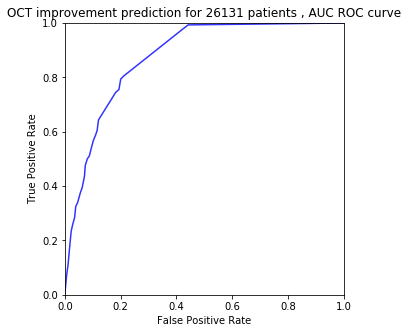

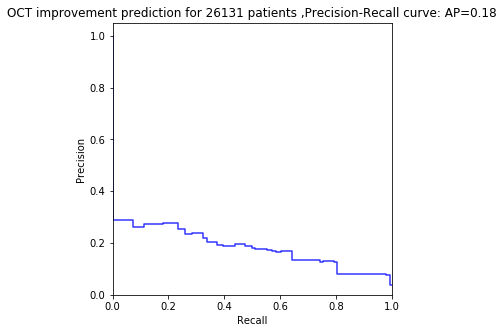

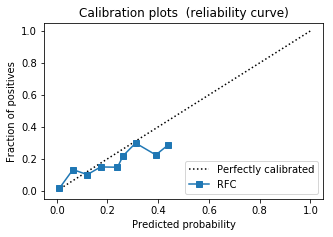

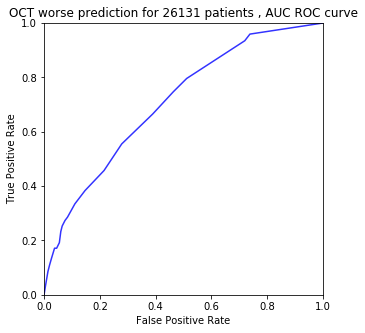

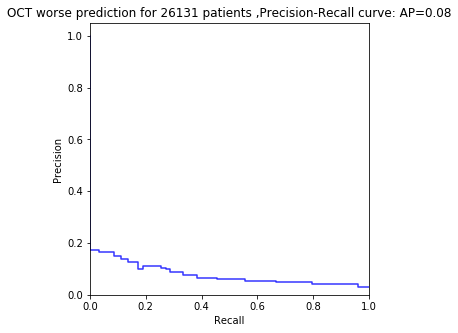

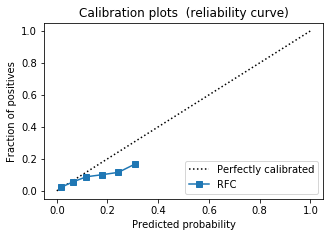

In [8]:

model_name = 'RFC'
seed=15
curves= ['PR','Calibration','ROC']
curves_helper.save_all_curves(targets,model_name,seed,number_of_patients,curves=curves,test_size=0.3,save_img=True)

### 3-3 Get all models in one graph

In [1]:

test_size = 0.3
seed=1
#models_to_test= ['RFC','Log']
curves=['PR']
models_to_test= ['RFC','CART','Log','XGB','OCT']

target='target_bin'


curves_helper.plot_all_models_one_graph(target,models_to_test,seed,number_of_patients,curves=curves,save_img=True)

NameError: name 'curves_helper' is not defined

RFC Average precision-recall score: 0.96
CART Average precision-recall score: 0.83
Log Average precision-recall score: 0.95
XGB Average precision-recall score: 0.97
OCT Average precision-recall score: 0.95


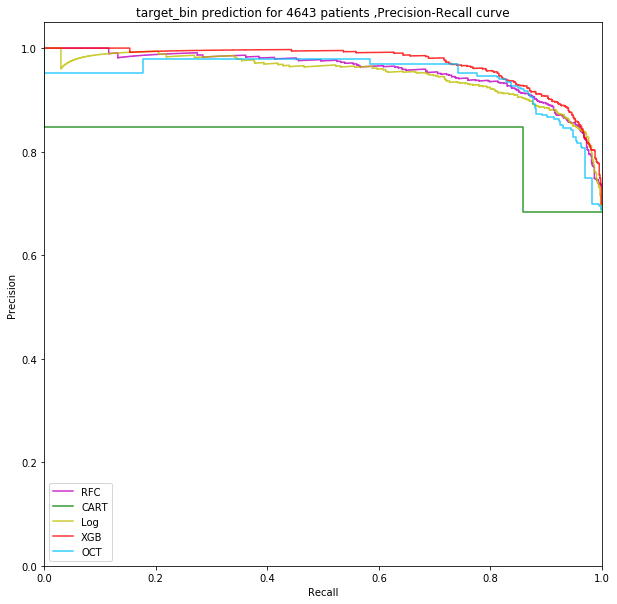

In [7]:

test_size = 0.25
seed=15
#models_to_test= ['RFC','Log']
curve='PR'
models_to_test= ['RFC','CART','Log','XGB','OCT']
#models_to_test= ['OCT']
target='target_bin'
curves_helper.plot_all_models_one_graph(target,models_to_test,seed,number_of_patients,curve=curve,imputation_method=imputation_method,save_img=False)